In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,972 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [2]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pytesseract
import shutil
import os
import random

try:
  from PIL import Image

except ImportError:
  import Image


In [11]:
image_path_in_colab='./mahan3.PNG'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)
print("done")


GS se Mahan MahanMahan ¢ > :

 

done


(114, 4)
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


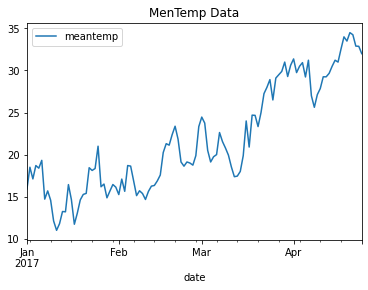

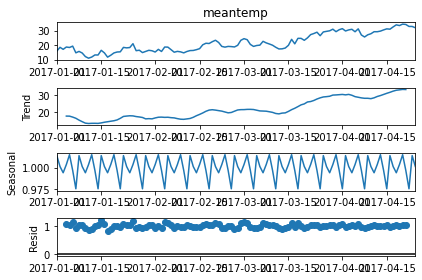

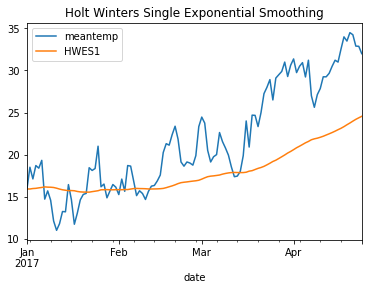

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


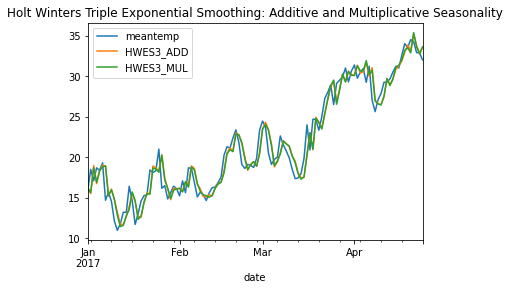

In [21]:
from pandas.io.formats.info import DataFrameInfoPrinter
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

path = './DailyDelhiClimateTest.csv'
df = pd.read_csv(path, index_col='date', parse_dates=True)
# finding shape of the dataframe
print(df.shape)
# having a look at the data
print(df.head())
# plotting the original data
df[['meantemp']].plot(title='MenTemp Data')
decompose_result = seasonal_decompose(df['meantemp'],model='multiplicative')
decompose_result.plot()
plt.show()


# Set the frequency of the date time index as Monthly start as indicated by the data
df.index.freq = 'D'
# Set the value of Alpha and define m (Time Period)
m = 24
alpha = 1/(2*m)
df['HWES1'] = SimpleExpSmoothing(df['meantemp']).fit(smoothing_level=alpha,                                           optimized=False,use_brute=True).fittedvalues
df[['meantemp','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');
plt.show()


# HWES3 model fit with smoothed raw, additive trend, and additive seasonal data.
df['HWES3_ADD'] = ExponentialSmoothing(df['meantemp'],
                 trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

# HWES3 model fit with smoothed raw, multiplicative trend, and multiplicative
# seasonal data.
df['HWES3_MUL'] = ExponentialSmoothing(df['meantemp'],
                 trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

# Plot raw data as well as fitted values for both HWES3 models. 
df[['meantemp','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')
plt.show()




In [25]:
import nltk
nltk.download('punkt')

from    nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
import pickle
import numpy
import tflearn
import tensorflow
import random

import json
with open('intents.json') as file:
    data = json.load(file)

words = []
labels = []
docs_x = []
docs_y = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        # Create word arrays. 
        wrds = nltk.word_tokenize(pattern)
        # Add to vocabulary.
        words.extend(wrds)

        # Create x & y where x is the words of a sentence
        # and y is the tag.
        docs_x.append(wrds)
        docs_y.append(intent["tag"])

    # Add unique tag to labels.
    if intent['tag'] not in labels:
        labels.append(intent['tag'])

# Truncate words to reduce vocabulary. 
# happen, happens and happening might be truncated to happen or some variation. 
words = [stemmer.stem(w.lower()) for w in words if w != "?"]

# Get unique words. 
words  = sorted(list(set(words)))
labels = sorted(labels)

training = []
output   = []

out_empty = [0 for _ in range(len(labels))]

# Create one-hot encoded vectors to represent words in the patterns. 
# [1,0,0,1,0] etc.
for x, doc in enumerate(docs_x):
    bag = []# Create bag of words containing all words for a pattern.

    wrds = [stemmer.stem(w.lower()) for w in doc]

    for w in words:
        if w in wrds:
            bag.append(1)
        else:
            bag.append(0)
    # Store one-hot encoded tag associated with current bag of words.
    output_row = out_empty[:]
    output_row[labels.index(docs_y[x])] = 1

    # Add bag of 1-hot encoded words and 1-hot encoded tag to separate lists.
    training.append(bag)
    output.append(output_row) # Assign tag for corresponding 1-hot-encoded vectors.

# Convert data to arrays. 
training = numpy.array(training)
output   = numpy.array(output)

# Save data.
with open("data.pickle", "wb") as f:
    pickle.dump((words, labels, training, output), f)

from tensorflow.python.framework import ops
ops.reset_default_graph()

# Define network. (Each input is same size so training[0] same size as all samples.)
net = tflearn.input_data(shape=[None, len(training[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(output[0]), activation="softmax")
net = tflearn.regression(net)

model = tflearn.DNN(net)     # Create deep neural network.
model.fit(training, output, n_epoch=1000, batch_size=8, show_metric=True)
model.save("model.tflearn")  # Save the model as a binary file.


Training Step: 2999  | total loss: 0.07390 | time: 0.010s
| Adam | epoch: 1000 | loss: 0.07390 - acc: 0.9942 -- iter: 16/20
Training Step: 3000  | total loss: 0.06899 | time: 0.016s
| Adam | epoch: 1000 | loss: 0.06899 - acc: 0.9947 -- iter: 20/20
--


In [23]:
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=a43d52da56afb5e7d8f22714d5b2361085c2020715d907404d092130e4543f42
  Stored in directory: /root/.cache/pip/wheels/4a/d5/f8/9585b4a100c0fd73da204ee785457d67c85e1b9050f009a849
Successfully built tflearn


In [26]:
# load data and model.
with open("data.pickle", "rb") as f:
   words, labels, training, output = pickle.load(f)

model.load("model.tflearn")

# Convert sentence to 1-hot encoded vector that can be input into the model.
def bag_of_words(s, words):
    bag = [0 for _ in range(len(words))]

    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]

    for se in s_words:
        for i, w in enumerate(words):
            if w == se:
                bag[i] = 1
            
    return numpy.array(bag)

# Prompt the user to ask a question and respond with an appropriate answer.
def chat():
    print("Start talking with the bot (type quit to stop)!")
    while True:
        userinput = input("Ask a question: ")
        if userinput.lower() == "quit":
            break

        results = model.predict([bag_of_words(userinput, words)])
        results_index = numpy.argmax(results)
        tag = labels[results_index]

        for tg in data["intents"]:
            if tg['tag'] == tag:
                responses = tg['responses']

        print(random.choice(responses))
chat()


Ask a question: whats your name
Start talking with the bot (type quit to stop)!
We're open every day 9am-9pm
Ask a question: what is your name?
Any time!
Ask a question: who is this
Hi there, how can I help?
Ask a question: name?
Bye! Come back again soon.
Ask a question: what?
Have a nice day
Ask a question: mahan
Have a nice day


KeyboardInterrupt: ignored